In [2]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [11]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """

    # create a padded version of the input image
    # to simplify the boundary conditions
    m, n = U.shape
    Uc = U.copy()
    Up = np.zeros((m+2, n+2))
    Up[1:-1, 1:-1] = Uc
    Up[0, 1:-1] = Uc[0, :]
    Up[-1, 1:-1] = Uc[-1, :]
    Up[1:-1, 0] = Uc[:, 0]
    Up[1:-1, -1] = Uc[:, -1]

    U = Up
    for n in range(N):
        U[1:-1,1:-1] = U[1:-1,1:-1] + lambda_ * (
            g(np.abs(U[1:-1,1:-1] - U[1:-1,0:-2])) * (U[1:-1,0:-2] - U[1:-1,1:-1]) +
            g(np.abs(U[1:-1,1:-1] - U[1:-1,2:])) * (U[1:-1,2:] - U[1:-1,1:-1]) +
            g(np.abs(U[1:-1,1:-1] - U[0:-2,1:-1])) * (U[0:-2,1:-1] - U[1:-1,1:-1]) +
            g(np.abs(U[1:-1,1:-1] - U[2:,1:-1])) * (U[2:,1:-1] - U[1:-1,1:-1]))
    return U
    

/var/folders/sz/v_dkg4ds1q39xbc6bvfh0w_80000gn/T/ipykernel_95022/3152962593.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  U = imread('balloon.jpg', as_gray=True) * 1./255


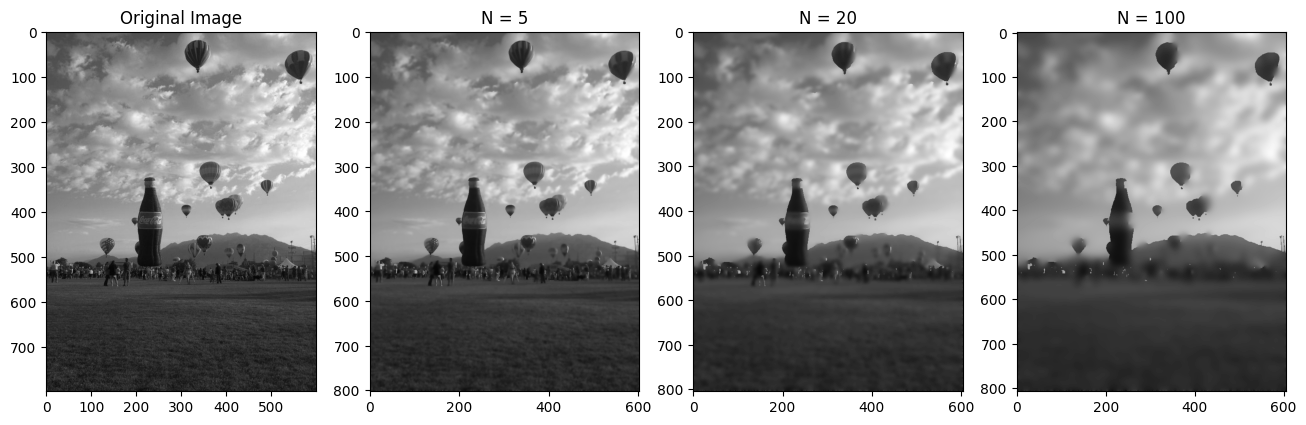

In [12]:
g = lambda x: np.exp(-(x / .1)**2)
# let U be a matrix of balloon.jpg grayscale values
U = imread('balloon.jpg', as_gray=True) * 1./255
lmda = .25
N = [5, 20, 100]

# show the original image, and the image for all three N's
fig, ax = plt.subplots(1, 4)
ax[0].imshow(U, cmap=cm.gray)
ax[0].set_title('Original Image')
for i in range(3):
    U = anisdiff_bw(U, N[i], lmda, g)
    ax[i+1].imshow(U, cmap=cm.gray)
    ax[i+1].set_title('N = {}'.format(N[i]))


# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [16]:
def anisdiff_color(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))

    # create a padded version of the input image
    # to simplify the boundary conditions, that takes into account 3 dims
    m, n, d = U.shape
    Uc = U.copy()
    Up = np.zeros((m+2, n+2, d))
    Up[1:-1, 1:-1, :] = Uc
    Up[0, 1:-1, :] = Uc[0, :, :]
    Up[-1, 1:-1, :] = Uc[-1, :, :]
    Up[1:-1, 0, :] = Uc[:, 0, :]
    Up[1:-1, -1, :] = Uc[:, -1, :]
    

    U = Up
    for n in range(N):
        U[1:-1,1:-1] = U[1:-1,1:-1] + lambda_ * (
            g(norm(U[1:-1,1:-1] - U[1:-1,0:-2])) * (U[1:-1,0:-2] - U[1:-1,1:-1]) +
            g(norm(U[1:-1,1:-1] - U[1:-1,2:])) * (U[1:-1,2:] - U[1:-1,1:-1]) +
            g(norm(U[1:-1,1:-1] - U[0:-2,1:-1])) * (U[0:-2,1:-1] - U[1:-1,1:-1]) +
            g(norm(U[1:-1,1:-1] - U[2:,1:-1])) * (U[2:,1:-1] - U[1:-1,1:-1]))
    return U
    

/var/folders/sz/v_dkg4ds1q39xbc6bvfh0w_80000gn/T/ipykernel_95022/1040273675.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  U = imread('balloons_color.jpg', as_gray=False) * 1./255


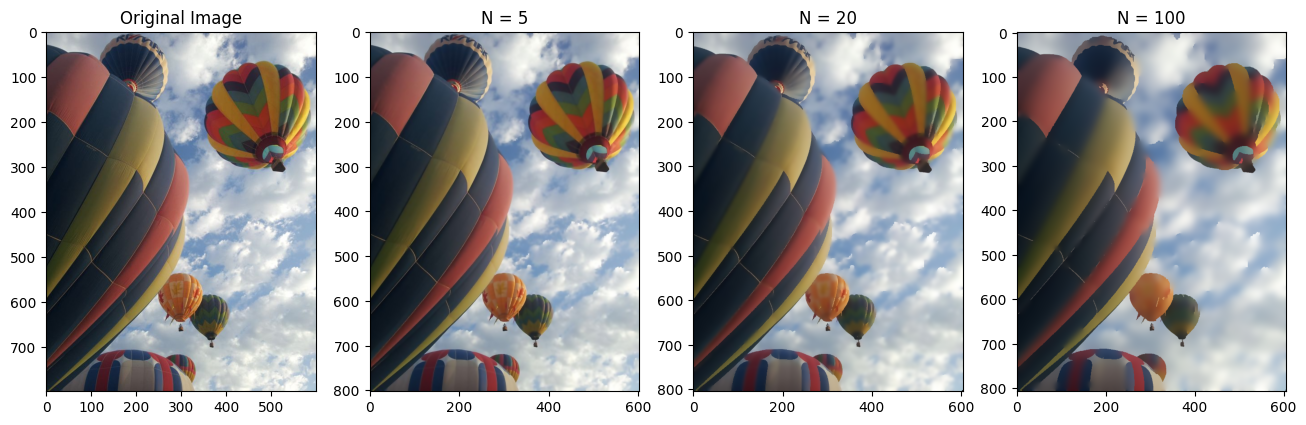

In [18]:
g = lambda x: np.exp(-(x / .1)**2)
# let U be a matrix of balloon.jpg grayscale values
U = imread('balloons_color.jpg', as_gray=False) * 1./255
lmda = .25
N = [5, 20, 100]

# show the original image, and the image for all three N's
fig, ax = plt.subplots(1, 4)
ax[0].imshow(U, cmap=cm.gray)
ax[0].set_title('Original Image')
for i in range(3):
    U = anisdiff_color(U, N[i], lmda, g)
    ax[i+1].imshow(U)
    ax[i+1].set_title('N = {}'.format(N[i]))

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

/var/folders/sz/v_dkg4ds1q39xbc6bvfh0w_80000gn/T/ipykernel_95022/3321521833.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('balloon.jpg', as_gray=True)


Text(0.5, 1.0, 'Noisy Image')

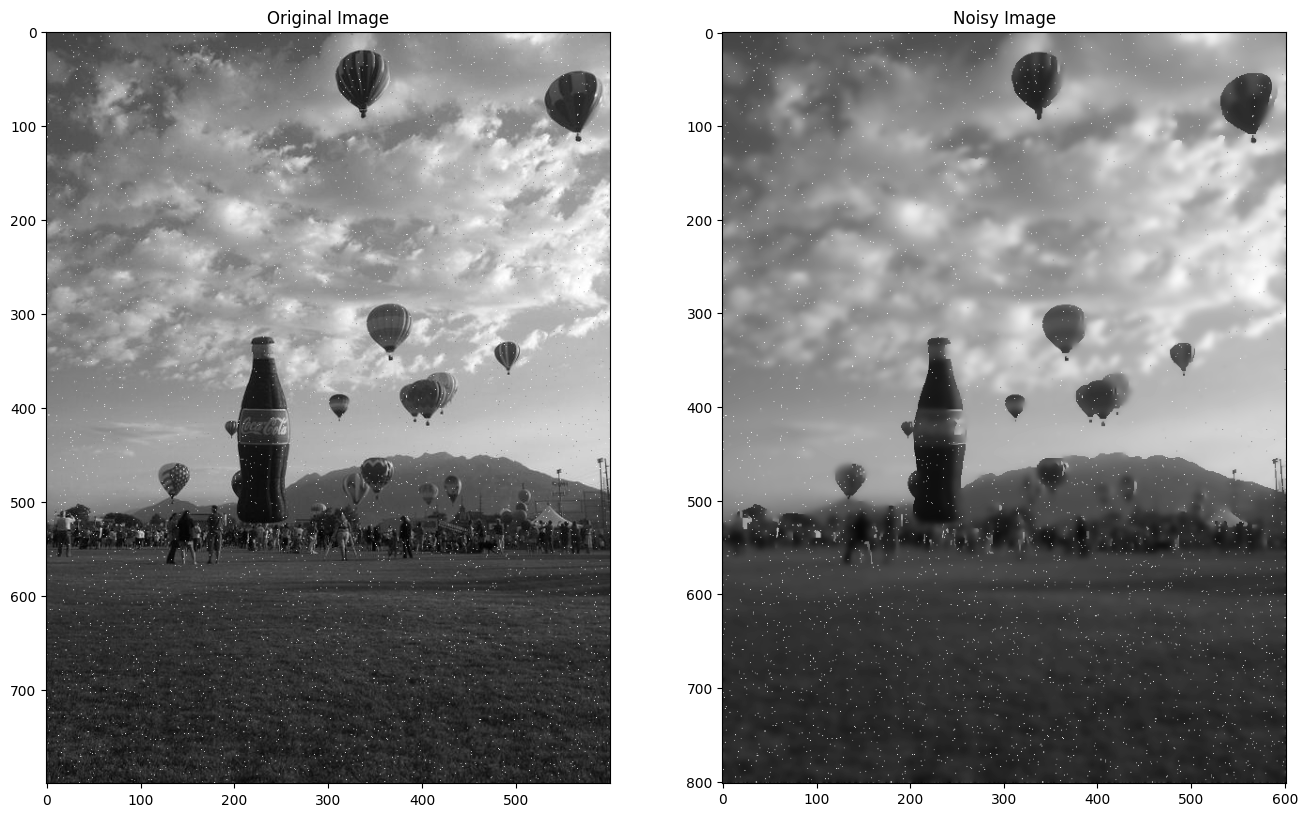

In [20]:
image = imread('balloon.jpg', as_gray=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

# run the anisotropic diffusion algorithm on the image
g = lambda x: np.exp(-(x / .1)**2)
lmda = .25
N = 20

image *= 1./255
# display original and noisy image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Original Image')
ax[1].imshow(anisdiff_bw(image, N, lmda, g), cmap=cm.gray)
ax[1].set_title('Noisy Image')

The reason that anisotropic diffusion does not smooth noise is because it is checking to smooth areas with little change in their composition, and increase contrast around defined edges. So this random pixel noise will not contribute to any small amount of variation in tones that this diffusion can combat.